# Health risks in U.S. newspapers: a corpus linguistic approach

### [Daniel McDonald](mailto:mcdonaldd@unimelb.edu.au?Subject=IPython%20NYT%20risk%20project), [Jens Zinn](mailto:jzinn@unimelb.edu.au?Subject=IPython%20NYT%20risk%20project), University of Melbourne

> This notebook builds on our earlier investigations:

1. Risk in the NYT
2. Risk in U.S. news

Previous literature and our pilot study both support the idea that health risks are both particularly and increasingly prominent. We want to test that in our 60 million word U.S. print news corpus.

As in our previous investigation, we begin by importing *corpkit*, setting paths to corpora, and the like.

In [6]:
# show plots in this notebook
%matplotlib inline
import os

# import corpkit
from corpkit import interrogator, editor, plotter, conc

# some wordlists we'll use later
from dictionaries.process_types import processes
from dictionaries.wordlists import wordlists
from dictionaries.roles import roles

# for editing/combining results:
import pandas as pd
pd.options.display.max_rows = 30
pd.options.display.max_columns = 6

In [108]:
nyt = 'data/NYT-parsed'
wsj = 'data/WSJ-parsed'
wap = 'data/WAP-parsed'
cht = 'data/CHT-parsed'
ust = 'data/UST-parsed'
tbt = 'data/TBT-parsed'
all_corpora = [nyt, wsj, wap, cht, ust, tbt]

In [39]:
from corpkit import load_result
allwords = load_result('6_allwords_newest')
riskwords = load_result('6_riskwords_newest')
riskclasses = load_result('6_riskclasses_newest')
risktags = load_result('6_risktags_newest')
n_risk = load_result('6_n_risk')
risk_of = load_result('6_risk_of')

In [ ]:
riskword = r'(?i)\brisk'

Let's begin.

### Locating health risks

The simplest and most effective way of determining the extent to which risk and health co-occur is to investigate the behaviour of *participants* in clauses. More specifically,

1. The risk of something
2. The something risk

These can be defined using Tregex queries:

In [ ]:
# noun in NP in PP headed by of in NP headed by nominal risk
risk_of_query = r'/NN.?/ >># (NP > (PP <<# /(?i)of/ > (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))'
risk_of = interrogator(corpora, 'words', risk_of_query, lemmatise = True,
        num_proc = 3,  quicksave = '6_risk_of')

In [104]:
risk_of['CHT'].results[:10]

,cancer,disease,attack,injury,...,minefield,mini,mining,005
1987,61,59,22,24,...,0,1,0,0
1988,60,42,49,27,...,0,0,0,0
1989,88,64,30,22,...,0,0,0,0
1990,51,55,24,22,...,0,0,0,0
1991,85,60,32,35,...,0,0,0,0
1992,163,83,55,26,...,0,0,0,0
1993,139,92,38,26,...,0,0,0,0
1994,160,75,42,45,...,0,0,0,1
1995,123,78,34,39,...,0,0,0,0
1996,113,95,37,42,...,0,0,0,0


In [ ]:
n_risk_query = r'/NN.?/ !># NP > (NP <<# (/NN.?/ < /(?i).?\brisk.?/))'
n_risk = interrogator(corpora, 'words', n_risk_query, lemmatise = True,
        num_proc = 3,  quicksave = '6_n_risk')

In [9]:
n_risk['WAP'].results[:10]

,health,security,cancer,...,miers,migraine,19203-jeanine
1987,84,44,44,...,0,0,0
1988,83,40,27,...,0,0,0
1989,95,25,77,...,0,0,0
1990,102,21,71,...,0,0,0
1991,94,37,17,...,0,0,0
1992,90,35,9,...,0,0,0
1993,69,28,28,...,0,0,0
1994,104,29,21,...,0,0,0
1995,61,17,17,...,0,0,0
1996,69,26,38,...,0,0,0


As in our last investigation, we can define a few helper functions to collapse distinctions betwee newspapers, years and entries:

In [36]:
def collapsed(interrogation):
    """collapse distinction between newspapers"""
    import pandas as pd
    interroformat = False
    if type(interrogation.values()[0]) == pd.core.frame.DataFrame:
        dat = interrogation.values()[0]
    else:
        dat = interrogation.values()[0].results
        interroformat = True
    order = list(dat.columns)
    for i in interrogation.values()[1:]:
        if interroformat:
            dat = dat.add(i.results, fill_value = 0)
        else:
            dat = dat.add(i, fill_value = 0)
    return dat[order]


def entry_across_corpora(result_dict, entry_name, regex = False):
    """get a single entry as a dataframe"""
    import pandas as pd
    import re
    res = []
    # for each corpus name and data
    for k, v in sorted(result_dict.items()):
        # grab the process result for each paper
        if not regex:
            try:
                column = v.results[entry_name]
            except:
                continue
        else:
            column = v.results[[c for c in list(v.results.columns) if re.search(entry_name, c)]].iloc[:,0]
        # rename it to the corpus name
        column.name = k
        # append to a list
        res.append(column)
    # concatenate and return
    return pd.concat(res, axis = 1)

def get_totals(interrogation):
    """helper function: get totals from dict of interrogations"""
    lst = []
    # for each interrogation name and data
    for k, v in interrogation.items():
        # get the totals
        tot = v.totals
        # name the totals with the newspaper
        tot.name = k.upper()
        # add to a list
        lst.append(tot)
    # turn the list into a dataframe
    return pd.concat(lst, axis = 1)

With these interrogations and functions, we have everything we need to do some visualisation.

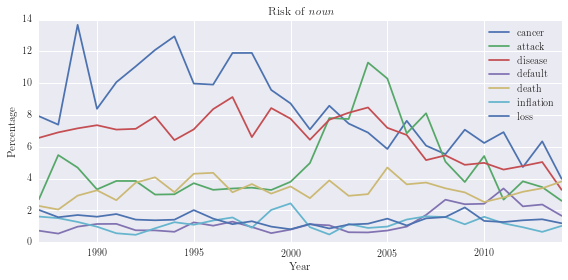

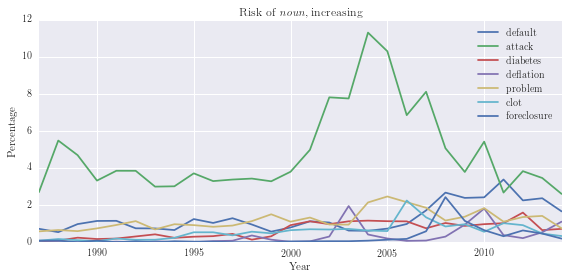

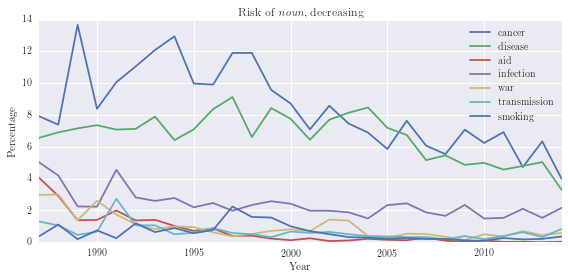

In [105]:
rel_coll = editor(collapsed(risk_of), '%', 'self', print_info = False)
inc_rel_coll = editor(collapsed(risk_of), '%', 'self', sort_by = 'increase', print_info = False)
dec_rel_coll = editor(collapsed(risk_of), '%', 'self', sort_by = 'decrease', print_info = False)

plotter('Risk of \emph{noun}', rel_coll.results)
plotter('Risk of \emph{noun}, increasing', inc_rel_coll.results)
plotter('Risk of \emph{noun}, decreasing', dec_rel_coll.results)

What jumps out here, of course, is the *risk of attack*, which rises quickly in popularity at the turn of the millenium. Let's look at this result across newspapers:

In [52]:
attack = entry_across_corpora(risk_of, 'attack')
attack[:10]

,CHT,NYT,TBT,UST,WAP,WSJ
1987,22,27,13,0,16,19
1988,49,42,41,3,32,25
1989,30,55,26,5,28,29
1990,24,37,17,3,14,21
1991,32,34,26,3,22,20
1992,55,22,27,13,16,16
1993,38,24,16,14,13,8
1994,42,24,11,10,15,13
1995,34,40,9,11,14,17
1996,37,26,10,8,10,20



16:32:41: images/rattack.png created.


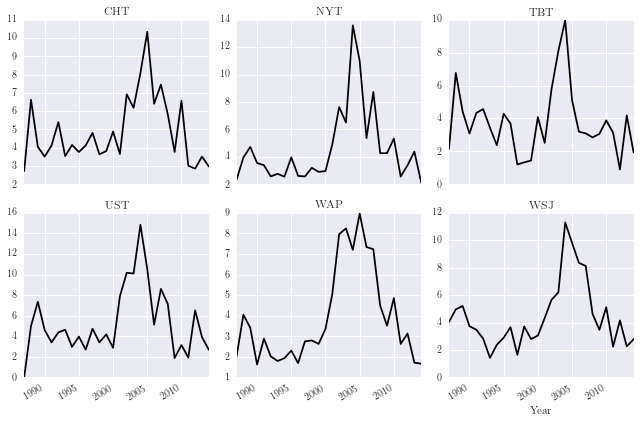

In [99]:
rel_attack = editor(attack, '%', get_totals(risk_of), print_info = False)
plotter('Risk of attack', rel_attack.results, subplots = True, layout = (2,3), figsize = (9,6), save = 'rattack')

... but, it's not what you think. While it's perhaps only natural that we assume that this construction occurs in the context of terrorism, closer inspection shows us something different:

In [115]:
r_of_attack = r'NP <<# (/NN.?/ < /(?i)\battack/) > (PP <<# /(?i)of/ > (NP <<# (/NN.?/ < /(?i).?\brisk.?/)))'
lines = conc(os.path.join(wap, '2004'), 't', r_of_attack, print_output = False, random = True)
lines[['l', 'm', 'r']]

,l,m,r
0,The White House and senators from both parties raised objections y...,terrorist attack,unless the changes are enacted quickly.
1,People suffering from the most common form of diabetes could sharp...,heart attacks and strokes,by taking a cholesterol-lowering drug even if they have normal ch...
2,"When Merck withdrew Vioxx on Sept. 30, after a company-sponsored s...",heart attack and stroke,"in users after 18 months, Merck said the data were ``unexpected. ''"
3,That study found that long-term use of the hormone estrogen by mil...,heart attack and stroke,.
4,Kerry also pledged to create a ``North American security perimeter...,terrorist attacks,in the region.
5,The five earlier orange alerts -- which indicate a high risk of,terrorist attack,"-- were applied to the nation as a whole, most recently on Dec. 3..."
6,Other reports handed over to the parliamentary commission reveal h...,attacks from Islamic radicals,.
...,...,...,...
89,Goss and others said that even if it turns out Celebrex and simila...,heart attacks and strokes,", many patients may be willing to take that risk to cut their chan..."
90,The CDC disclosed its new advisory in a commentary to a study publ...,a heart attack,.


Risk patterns with health topics much more than we seem to assume it does. In fact, if we do two searches, for *risk of heart attack* and *risk of terror attack*, we can measure the difference:

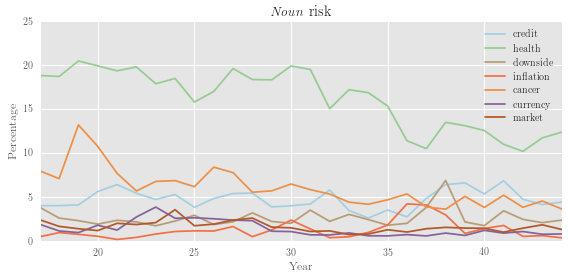

In [49]:
rel_coll = editor(collapsed(n_risk), '%', 'self', print_info = False)
plotter('\emph{Noun} risk', rel_coll.results)

The important thing to note is that these two categories have overlap, but are not grammatically interchangable. You can say "the risk of cancer" or "the cancer risk", but you can't say "the risk of health".

Semantically, only the *negative outcome* can occur in both positions: the *risked thing* can only occur before the risk.

Fortunately for us, it's unambiguous whether or not a word is the *negative outcome* or the *risked thing*. Furthermore, we can apply grammatical tests to be certain:

> 1a. I risked my life

> 1b. I risked losing my life

> 2a. I risked death

> 2b. * I risked losing death

So, let's make a simple list:

In [47]:
riskedthing = ['life', 'everything', 'money', 'career', 'health', 'lot',
               'reputation', 'capital', 'future', 'job', 'safety', 'credit', 'currency',
               'possibility', 'anything', 'return', 'neck', 'nothing']

Let's combine the two results (knowing full well that they aren't perfect equivalents):

In [41]:
riskthings = {}
for name, data in risk_of.items():
    df = data.results.add(n_risk[name].results, fill_value = 0)
    df.ix['total'] = df.sum()
    df = df.T.sort('total', ascending = False).T
    df = df.drop('total', axis = 0)
    riskthings[name] = df


***Processing results***

***Done!***



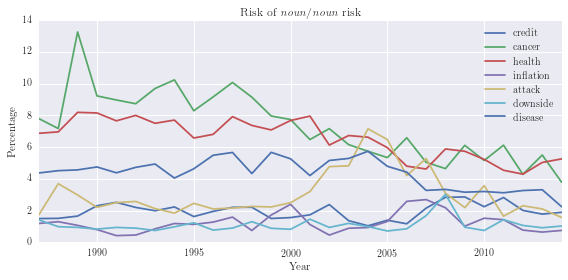

In [98]:
#collapsed(riskthings)

rel_coll = editor(collapsed(riskthings), '%', 'self')
plotter('Risk of \emph{noun}\slash \emph{noun} risk', rel_coll.results)

We can define some fairly unambiguous wordlists, too:

In [64]:
cats = {'Health': ['cancer', 'health', 'attack', 'disease', 'death', 'infection', 'heart', 'stroke', 'injury',  
          'smoking', 'clot', 'complication', 'heart-attack', 'diabetes', 'fracture', 'drug',  'bleeding', 
          'suicide', 'contagion', 'mortality', 'illness', 'aid', 'breast', 'miscarriage',  'dementia', 
          'radiation', 'surgery', 'life', 'depression', 'osteoporosis', 'pregnancy', 'breast-cancer', 
          'birth', 'disorder', 'leukemia'],
        'Finance': ['credit', 'inflation', 'default', 'market', 'currency', 'investment', 'interest-rate', 'recession', 
           'business', 'deflation', 'price', 'return', 'litigation', 'rate', 'cost', 'loan', 'counterparty', 
           'trading', 'portfolio', 'stock', 'liability', 'prepayment', 'fund', 'bond', 'growth', 'asset', 
           'decline', 'liquidity', 'lending', 'volatility', 'bank', 'fraud', 'insurance', 'mortgage', 'rollover', 
           'company', 'accident', 'debt', 'interest', 'bankruptcy', 'slowdown', 'expense', 
           'collapse', 'foreign-exchange', 'deal', 'downturn', 'transmission', 
           'foreclosure', 'exchange-rate', 'exchange', 'bubble', 'derivative', 
           'stock-market', 'devaluation', 'capital', 'pressure', 'downgrade', 
           'fluctuation', 'investor', 'crash', 'taxpayer', 'economy', 'investing', 'dollar', 
           'tax', 'national-security', 'equity', 'trade', 'transaction', 'money', 'career', 
           'executive', 'industry', 'run', 'insolvency', 'underwriting', 'claim', 'settlement']}

uncategorised = [u'downside', 'security', 'loss', 'benefit', 'safety', 'failure', 'problem', 'reward', 'event', 
                 'war', 'flight', 'damage', 'effect', 'course', 'exposure', 'fire', 'country', 'policy', 'control', 
                 'execution', 'u.s', 'increase', 'crisis', 'terrorism', 'defect', 'harm', 'uncertainty', 
                 'lifetime', 'strategy', 'product', 'change', 'recurrence', 'conflict', 'lawsuit', 'contamination', 
                 'government', 'development', 'disruption', 'move', 'opportunity', 'action', 'violence', 'error', 
                 'mr', 'theft', 'use', 'type', 'inventory', 'treatment', 'explosion', 'proliferation', 'headline', 
                 'behavior', 'project', 'material', 'risk', 'china', 'delay', 'weakness', 'abuse', 'earthquake', 
                 'backlash', 'flooding', 'correction', 'approach', 'integration', 'strike', 'reaction', 'collision', 
                 'spill', 'program', 'casualty', 'shock', 'system', 'hurricane', 'flood', 'challenge', 'instability', 
                 'longevity', 'activity', 'catastrophe', 'overheating', 'issue', 'disaster', 'cut', 'property', 
                 'meltdown']

In [93]:
#get_totals(risk_of)
comp_n_risk = editor(n_risk, merge_entries = cats, just_entries = cats.keys())


***Processing results***

Merging 78 entries as "finance":
    credit
    inflation
    default
    market
    currency
    investment
    interest-rate
    recession
    business
    deflation
... and 68 more ... 

Merging 34 entries as "health":
    cancer
    health
    attack
    disease
    death
    infection
    heart
    stroke
    injury
    smoking
... and 24 more ... 

Keeping 2 entries:
    health
    finance

***Done!***


16:26:58: Finished! Output is a dictionary with keys:

         'CHT'
         'NYT'
         'TBT'
         'UST'
         'WAP'
         'WSJ'




***Processing results***

***Done!***



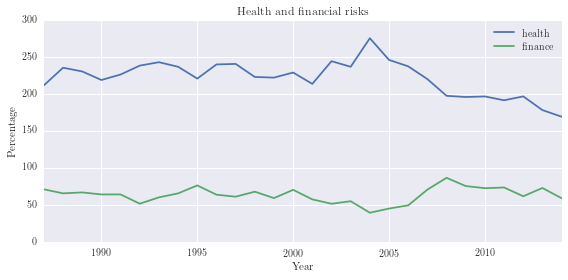

In [97]:
rel_tot = editor(collapsed(comp_risk_of), '%', get_totals(risk_of), 
                 use_df2_totals = True, sort_by = 'total')
plotter('Health and financial risks', rel_tot.results, style = 'seaborn-notebook')

Breaking this down by publication, we can expect to see more financially oriented newspapers focussing more on financial risks:

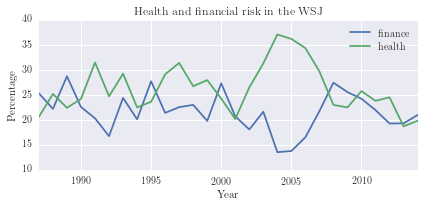

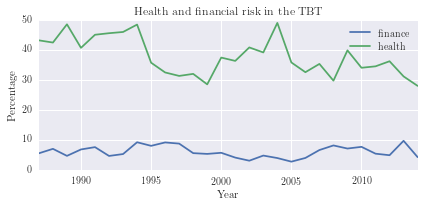

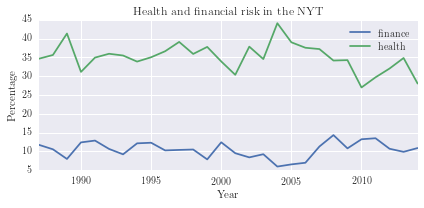

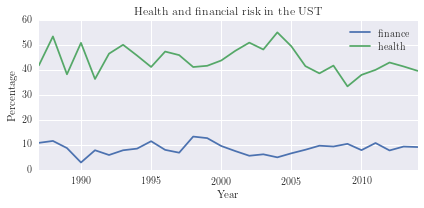

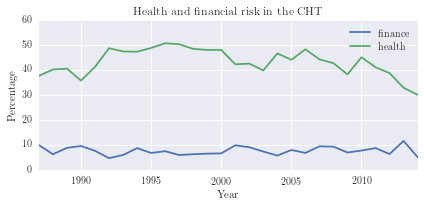

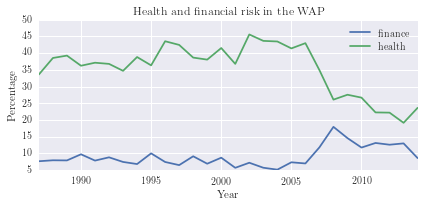

In [94]:
rel_comp_risk_of = editor(risk_of, '%', risk_of, use_df2_totals = True, \
                      merge_entries = cats, just_entries = cats.keys(), print_info = False)
for name, data in rel_comp_risk_of.items():
    plotter('Health and financial risk in the %s' % name, data.results, 
            style = 'seaborn-notebook', figsize = (6, 3), legend_pos = 'upper right')